# Combine Dataset NutriGoal: Diet App for Regular Nutrition Monitoring and Meal Scheduling

## Dataset yang Digunakan
Untuk mendukung fungsionalitas aplikasi, kami menggunakan kombinasi tiga dataset berikut:

### 1. **Diets, Recipes, and Their Nutrients**
   - **Sumber**: [Diets, Recipes, and Their Nutrients](https://www.kaggle.com/datasets/thedevastator/healthy-diet-recipes-a-comprehensive-dataset?select=All_Diets.csv)
   - **File Akan Digunakan**: `All_Diets.csv`,`vegan.csv`,`keto.csv`

### 2. **Nutritional Values for Common Foods and Products**
   - **Sumber**: [Nutritional Values for Common Foods and Products](https://www.kaggle.com/datasets/trolukovich/nutritional-values-for-common-foods-and-products)
   - **File Akan Digunakan**: `nutrition.csv`

### 3. **Food.com - Recipes and Reviews**
   - **Sumber**: [Food.com - Recipes and Reviews](https://www.kaggle.com/datasets/irkaal/foodcom-recipes-and-reviews?select=recipes.csv)
   - **File Akan Digunakan**: `recipes.csv`

# Import Library

In [1]:
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt

### 1. **Diets, Recipes, and Their Nutrients**

In [2]:
df1 = pd.read_csv('../data/Category Diets/All_Diets.csv')
# Basic info and statistics of the dataset
df1.info()

# Check for missing values
df1.isnull().sum()

# Display basic statistics of the numeric columns
df1.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7806 entries, 0 to 7805
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Diet_type        7806 non-null   object 
 1   Recipe_name      7806 non-null   object 
 2   Cuisine_type     7806 non-null   object 
 3   Protein(g)       7806 non-null   float64
 4   Carbs(g)         7806 non-null   float64
 5   Fat(g)           7806 non-null   float64
 6   Extraction_day   7806 non-null   object 
 7   Extraction_time  7806 non-null   object 
dtypes: float64(3), object(5)
memory usage: 488.0+ KB


,Protein(g),Carbs(g),Fat(g)
count,7806.000000,7806.000000,7806.000000
mean,83.231498,152.123189,117.328542
std,89.797282,185.907322,122.098117
min,0.000000,0.060000,0.000000
25%,24.415000,36.162500,41.067500
50%,56.280000,93.415000,84.865000
75%,112.357500,205.915000,158.290000
max,1273.610000,3405.550000,1930.240000


Terdapat Data Yang Hilang Sebanyak  0 Kolom, Dengan Nama Kolom : 
Series([], dtype: int64)


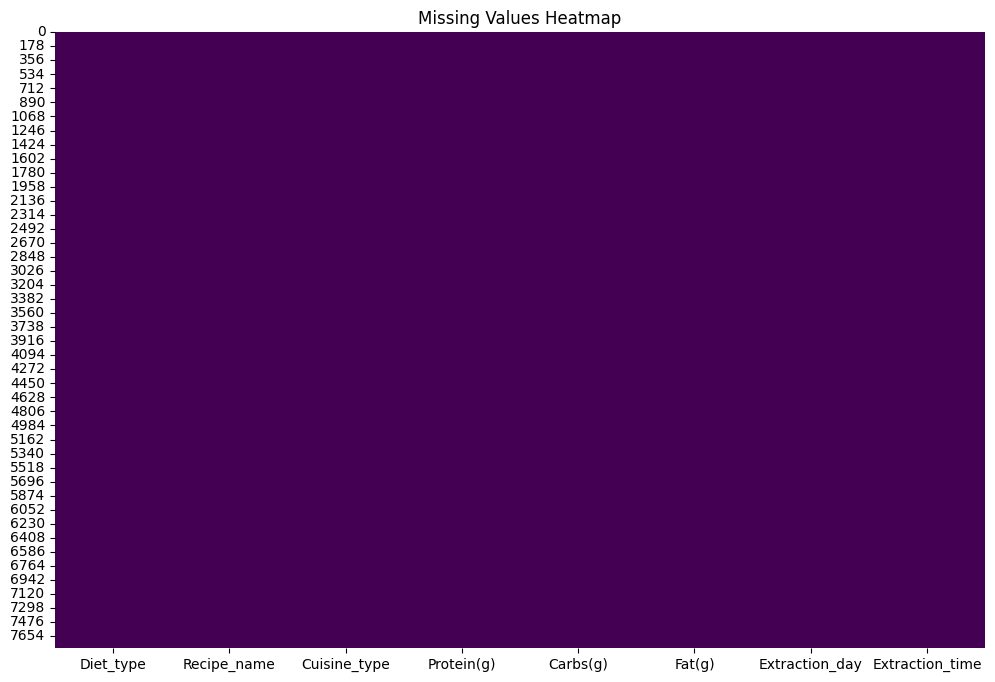

In [3]:
df_missing_values = df1.isnull().sum()
df_missing_columns = df_missing_values[df_missing_values > 0]
print("Terdapat Data Yang Hilang Sebanyak ",df_missing_columns.count(), "Kolom, Dengan Nama Kolom : ")
print(df_missing_columns)
plt.figure(figsize=(12, 8))
sns.heatmap(df1.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

### 2. **Nutritional Values for Common Foods and Products**

In [4]:
df2 = pd.read_csv('../data/Food/cleaned_data_nutrition.csv')
# Basic info and statistics of the dataset
df2.info()

# Check for missing values
df2.isnull().sum()

# Display basic statistics of the numeric columns
df2.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8789 entries, 0 to 8788
Data columns (total 76 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   name                             8789 non-null   object 
 1   serving_size (g)                 8789 non-null   float64
 2   calories                         8789 non-null   int64  
 3   total_fat (g)                    8789 non-null   float64
 4   saturated_fat (g)                8789 non-null   float64
 5   cholesterol (mg)                 8789 non-null   float64
 6   sodium (mg)                      8789 non-null   float64
 7   choline (mg)                     8789 non-null   float64
 8   folate (mcg)                     8789 non-null   float64
 9   folic_acid (mcg)                 8789 non-null   float64
 10  niacin (mg)                      8789 non-null   float64
 11  pantothenic_acid (mg)            8789 non-null   float64
 12  riboflavin (mg)     

,serving_size (g),calories,total_fat (g),saturated_fat (g),cholesterol (mg),sodium (mg),choline (mg),folate (mcg),folic_acid (mcg),niacin (mg),...,fat (g),saturated_fatty_acids (g),monounsaturated_fatty_acids (g),polyunsaturated_fatty_acids (g),fatty_acids_total_trans (mg),alcohol (g),ash (g),caffeine (mg),theobromine (mg),water (g)
count,8789.0,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,...,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000
mean,100.0,226.283878,10.556855,3.434281,38.723063,306.353851,23.681249,44.085561,17.638639,3.400145,...,10.550794,3.434146,3.772313,2.114332,38.723063,0.117522,1.717408,2.608829,4.695642,54.112074
std,0.0,169.862001,15.818247,6.429758,117.358944,939.220468,51.332265,127.670410,100.736270,4.765302,...,15.814870,6.426586,6.826234,5.050045,117.358944,1.600127,2.967751,82.070233,60.962608,30.772999
min,100.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,100.0,91.000000,1.000000,0.100000,0.000000,36.000000,0.000000,2.000000,0.000000,0.374000,...,0.950000,0.149000,0.074000,0.134000,0.000000,0.000000,0.770000,0.000000,0.000000,29.700000
50%,100.0,191.000000,5.100000,1.400000,2.000000,84.000000,1.600000,9.000000,0.000000,2.111000,...,5.130000,1.435000,1.600000,0.591000,2.000000,0.000000,1.170000,0.000000,0.000000,63.080000
75%,100.0,337.000000,14.000000,4.200000,65.000000,396.000000,29.400000,35.000000,0.000000,5.063000,...,13.720000,4.174000,4.760000,1.880000,65.000000,0.000000,2.020000,0.000000,0.000000,77.960000
max,100.0,902.000000,100.000000,96.000000,3100.000000,38758.000000,2403.300000,3786.000000,2993.000000,127.500000,...,100.000000,95.600000,83.689000,74.623000,3100.000000,42.500000,99.800000,5714.000000,2634.000000,100.000000


Terdapat Data Yang Hilang Sebanyak  0 Kolom, Dengan Nama Kolom : 
Series([], dtype: int64)


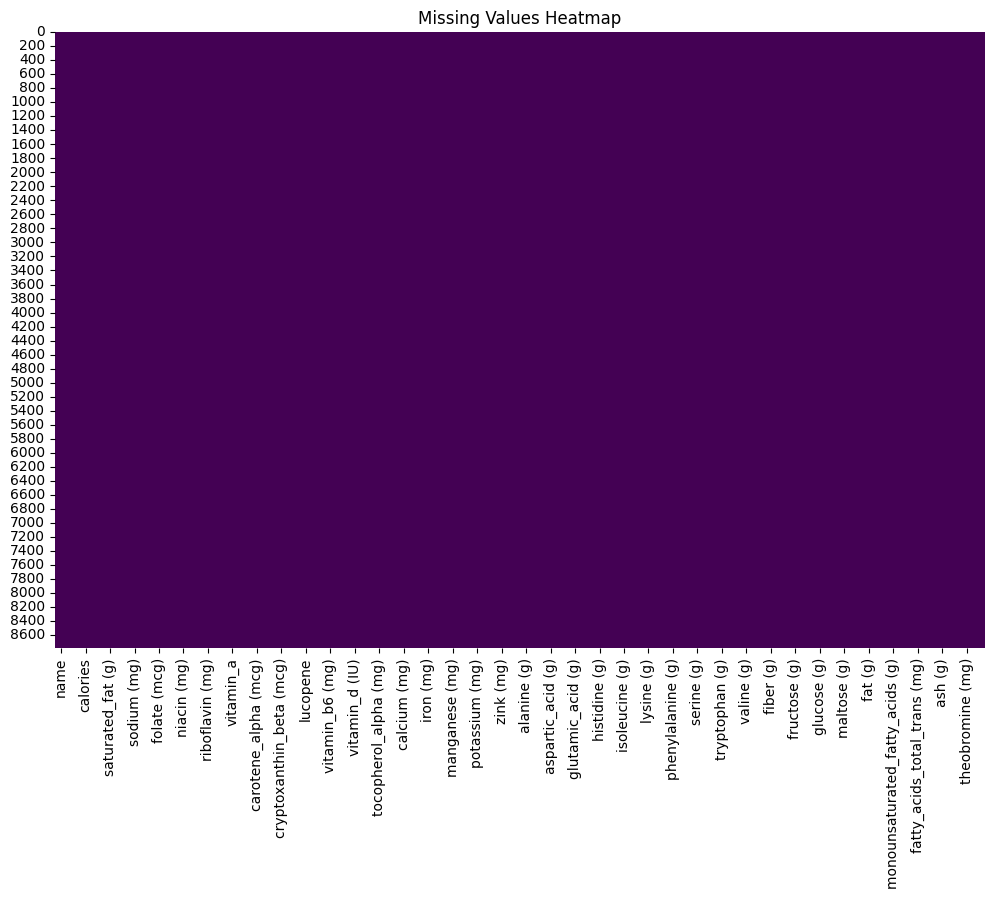

In [5]:
df_missing_values = df2.isnull().sum()
df_missing_columns = df_missing_values[df_missing_values > 0]
print("Terdapat Data Yang Hilang Sebanyak ",df_missing_columns.count(), "Kolom, Dengan Nama Kolom : ")
print(df_missing_columns)
plt.figure(figsize=(12, 8))
sns.heatmap(df2.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

### 3. **Food.com - Recipes and Reviews**

In [6]:
df3 = pd.read_csv('../data/Food.com - Recipes and Reviews/recipes.csv')
# Basic info and statistics of the dataset
df3.info()

# Check for missing values
df3.isnull().sum()

# Display basic statistics of the numeric columns
df3.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522517 entries, 0 to 522516
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   RecipeId                    522517 non-null  int64  
 1   Name                        522517 non-null  object 
 2   AuthorId                    522517 non-null  int64  
 3   AuthorName                  522517 non-null  object 
 4   CookTime                    439972 non-null  object 
 5   PrepTime                    522517 non-null  object 
 6   TotalTime                   522517 non-null  object 
 7   DatePublished               522517 non-null  object 
 8   Description                 522512 non-null  object 
 9   Images                      522516 non-null  object 
 10  RecipeCategory              521766 non-null  object 
 11  Keywords                    505280 non-null  object 
 12  RecipeIngredientQuantities  522514 non-null  object 
 13  RecipeIngredie

,RecipeId,AuthorId,AggregatedRating,ReviewCount,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings
count,522517.000000,5.225170e+05,269294.000000,275028.000000,522517.000000,522517.000000,522517.000000,522517.000000,5.225170e+05,522517.000000,522517.000000,522517.000000,522517.000000,339606.000000
mean,271821.436970,4.572585e+07,4.632014,5.227784,484.438580,24.614922,9.559457,86.487003,7.672639e+02,49.089092,3.843242,21.878254,17.469510,8.606191
std,155495.878422,2.929714e+08,0.641934,20.381347,1397.116649,111.485798,46.622621,301.987009,4.203621e+03,180.822062,8.603163,142.620191,40.128837,114.319809
min,38.000000,2.700000e+01,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000
25%,137206.000000,6.947400e+04,4.500000,1.000000,174.200000,5.600000,1.500000,3.800000,1.233000e+02,12.800000,0.800000,2.500000,3.500000,4.000000
50%,271758.000000,2.389370e+05,5.000000,2.000000,317.100000,13.800000,4.700000,42.600000,3.533000e+02,28.200000,2.200000,6.400000,9.100000,6.000000
75%,406145.000000,5.658280e+05,5.000000,4.000000,529.100000,27.400000,10.800000,107.900000,7.922000e+02,51.100000,4.600000,17.900000,25.000000,8.000000
max,541383.000000,2.002886e+09,5.000000,3063.000000,612854.600000,64368.100000,26740.600000,130456.400000,1.246921e+06,108294.600000,3012.000000,90682.300000,18396.200000,32767.000000


Terdapat Data Yang Hilang Sebanyak  10 Kolom, Dengan Nama Kolom : 
CookTime                       82545
Description                        5
Images                             1
RecipeCategory                   751
Keywords                       17237
RecipeIngredientQuantities         3
AggregatedRating              253223
ReviewCount                   247489
RecipeServings                182911
RecipeYield                   348071
dtype: int64


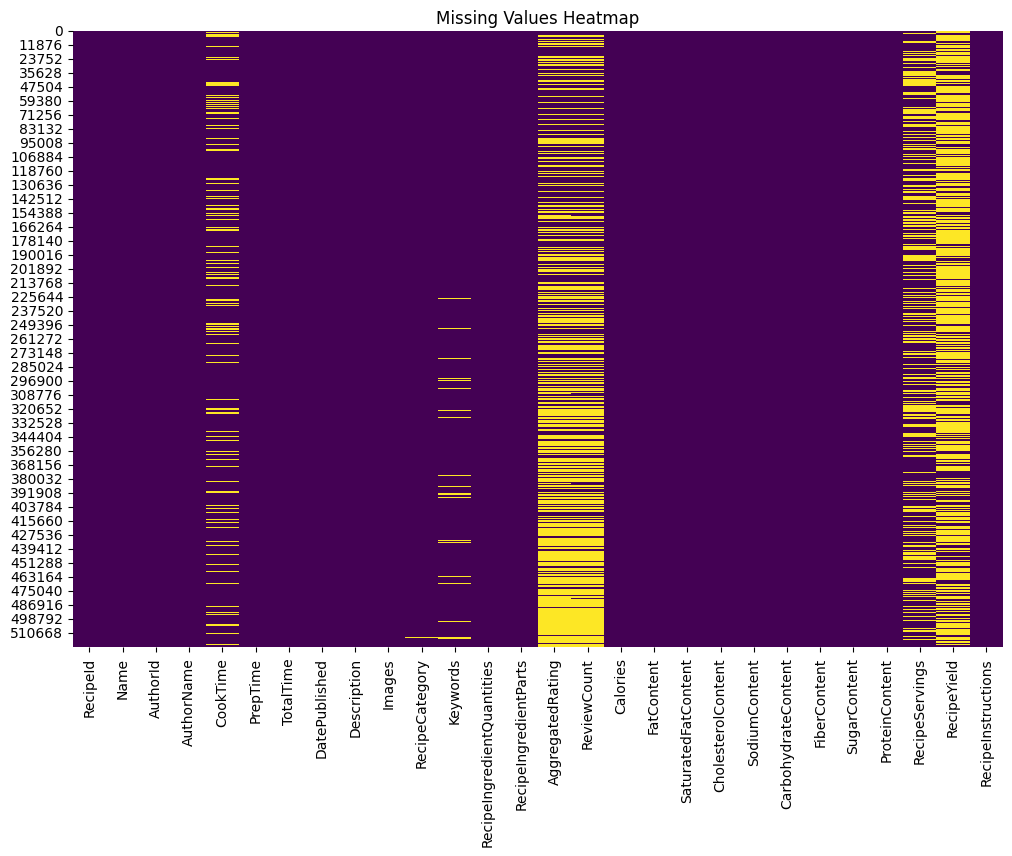

In [7]:
df_missing_values = df3.isnull().sum()
df_missing_columns = df_missing_values[df_missing_values > 0]
print("Terdapat Data Yang Hilang Sebanyak ",df_missing_columns.count(), "Kolom, Dengan Nama Kolom : ")
print(df_missing_columns)
plt.figure(figsize=(12, 8))
sns.heatmap(df3.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

### Combine Dataset 2 and 3

**Collect Collum `Name`, `Calories`, `Protein(g)`, `Fat(g)`, `SaturatedFat(g)`, `Cholesterol`, `Sodium(mg)`, `Carbohydrate(g)`, `Fiber(g)`, dan `Sugar(g)`**

In [8]:
# Load datasets
df2 = pd.read_csv('../data/Food/cleaned_data_nutrition.csv')
df3 = pd.read_csv('../data/Food.com - Recipes and Reviews/recipes.csv')

# Daftar simbol atau teks yang ingin diganti
symbols_to_replace = [
    "&rsquo;", "n&rsquo;", "&quot;", "&ndash;", "&nbsp;", "&mdash;", "&lt",
    "&lsquo;", "&rsquo;", "#5FIX", "&iquest;", "&deg;", "&amp;", "/", "-", "&",
    "#8219;", "&agrave;", "&aacute;", "&Uuml;", "&Scaron;", "&Ouml;", "&Eacute;",
    "&eacute;", "&Ccedil;", "&Auml;", "&Aring;", "&Agrave;", "&Aacute;", "&AElig;",
    "&#55356;", "&#", "&#55358;", "&#56670;", "&#2980;", "&#2965;", "&#3021;", 
    "&#2965;", "&#", "'#", "#001", "#1", "#1)", "#1,", "#10", "#100", "#11", 
    "#12", "#12)", "#13", "#147", "#16", "#181", "#2", "#2)", "#2,", "#219", 
    "#22)", "#2:", "#3", "#3)", "#3,", "#32541", "#37", "#3947527459", "#4", 
    "#412", "#5", "#5)", "#5,", "#57!)", "#5FIX", "#6", "#7", "#7,", "#8", 
    "#840768)", "#9", "#A1", "#RSC", "#Ragu", "#SP4", "#SP5", "\"#SP5'", 
    "#rz.16463", "#tastypartytidbits", "$", "$10", "$10,000", "$100", "$2", 
    "$20,000", "$2000", "$25", "$250", "$8", "%", "&", ";", "\"AWW\"", "!"
]

# Ganti simbol dengan spasi di kolom 'Name'
for symbol in symbols_to_replace:
    df3['Name'] = df3['Name'].str.replace(symbol, ' ', regex=False)

# Hapus spasi berlebih
df3['Name'] = df3['Name'].str.replace(r'\s+', ' ', regex=True).str.strip()

# Rename columns for consistency
df2_renamed = df2.rename(columns={
    'name': 'Name',
    'calories': 'Calories',
    'protein (g)': 'Protein(g)',
    'fat (g)': 'Fat(g)',
    'saturated_fat (g)': 'SaturatedFat(g)',
    'cholesterol (mg)': 'Cholesterol(mg)',
    'sodium (mg)': 'Sodium(mg)',
    'carbohydrate (g)': 'Carbohydrate(g)',
    'fiber (g)': 'Fiber(g)',
    'sugars (g)': 'Sugar(g)'
})

df3_renamed = df3.rename(columns={
    'Name': 'Name',
    'Calories': 'Calories',
    'ProteinContent': 'Protein(g)',
    'FatContent': 'Fat(g)',
    'SaturatedFatContent': 'SaturatedFat(g)',
    'CholesterolContent': 'Cholesterol(mg)',
    'SodiumContent': 'Sodium(mg)',
    'CarbohydrateContent': 'Carbohydrate(g)',
    'FiberContent': 'Fiber(g)',
    'SugarContent': 'Sugar(g)'
})

# Select relevant columns
df2_filtered = df2_renamed[['Name', 'Calories', 'Protein(g)', 'Fat(g)', 'SaturatedFat(g)', 
                            'Cholesterol(mg)', 'Sodium(mg)', 'Carbohydrate(g)', 'Fiber(g)', 'Sugar(g)']]
df3_filtered = df3_renamed[['Name', 'Calories', 'Protein(g)', 'Fat(g)', 'SaturatedFat(g)', 
                            'Cholesterol(mg)', 'Sodium(mg)', 'Carbohydrate(g)', 'Fiber(g)', 'Sugar(g)']]

# Combine datasets
combined_dataset = pd.concat([df2_filtered, df3_filtered])

# Drop duplicates (optional, if needed)
combined_dataset = combined_dataset.drop_duplicates()

# Save to CSV
combined_dataset.to_csv('../data/combine-dataset.csv', index=False)

print("Dataset berhasil digabungkan dan disimpan sebagai 'combine-dataset.csv'.")

Dataset berhasil digabungkan dan disimpan sebagai 'combine-dataset.csv'.
